# 7. Project: Transformers, Self-Attention, and Language Models (LLMs)

Code snippet in Python using PyTorch to demonstrate the self-attention mechanism and the basic structure of a Transformer:

In [ ]:
import torch
import torch.nn.functional as F

class SelfAttention(torch.nn.Module):
    def __init__(self, embed_size, heads):
        super(SelfAttention, self).__init__()
        self.embed_size = embed_size
        self.heads = heads
        self.head_dim = embed_size // heads

        assert (
            self.head_dim * heads == embed_size
        ), "Embedding size needs to be divisible by heads"

        self.values = torch.nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.keys = torch.nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.queries = torch.nn.Linear(self.head_dim, self.head_dim, bias=False)
        self.fc_out = torch.nn.Linear(heads * self.head_dim, embed_size)

    def forward(self, values, keys, query, mask):
        N = query.shape[0]
        value_len, key_len, query_len = values.shape[1], keys.shape[1], query.shape[1]

        values = self.values(values)
        keys = self.keys(keys)
        queries = self.queries(query)

        values = values.reshape(N, value_len, self.heads, self.head_dim)
        keys = keys.reshape(N, key_len, self.heads, self.head_dim)
        queries = queries.reshape(N, query_len, self.heads, self.head_dim)

        values = values.permute(0, 2, 1, 3)
        keys = keys.permute(0, 2, 1, 3)
        queries = queries.permute(0, 2, 1, 3)

        energy = torch.einsum("nqhd,nkhd->nhqk", [queries, keys]) # [N, num_heads, query_len, key_len]

        if mask is not None:
            energy = energy.masked_fill(mask == 0, float("-1e20"))

        attention = torch.nn.functional.softmax(energy / (self.embed_size ** (1 / 2)), dim=3)

        out = torch.einsum("nhql,nlhd->nqhd", [attention, values]).reshape(
            N, query_len, self.heads * self.head_dim
        )

        out = self.fc_out(out)
        return out


# Detailed Architecture of a Large Language Model with Transformer
### Introduction
A large language model, based on the Transformer architecture, is a powerful neural network used for various natural language processing (NLP) tasks, including language generation, translation, summarization, and more. The model's core components are the Transformer blocks, which consist of self-attention layers and feedforward neural networks.

### Transformer Block
The Transformer block is the fundamental unit of a Transformer-based model. It comprises two main sub-modules: Multi-Head Self-Attention and Position-wise Feed-Forward Networks.

1. Multi-Head Self-Attention

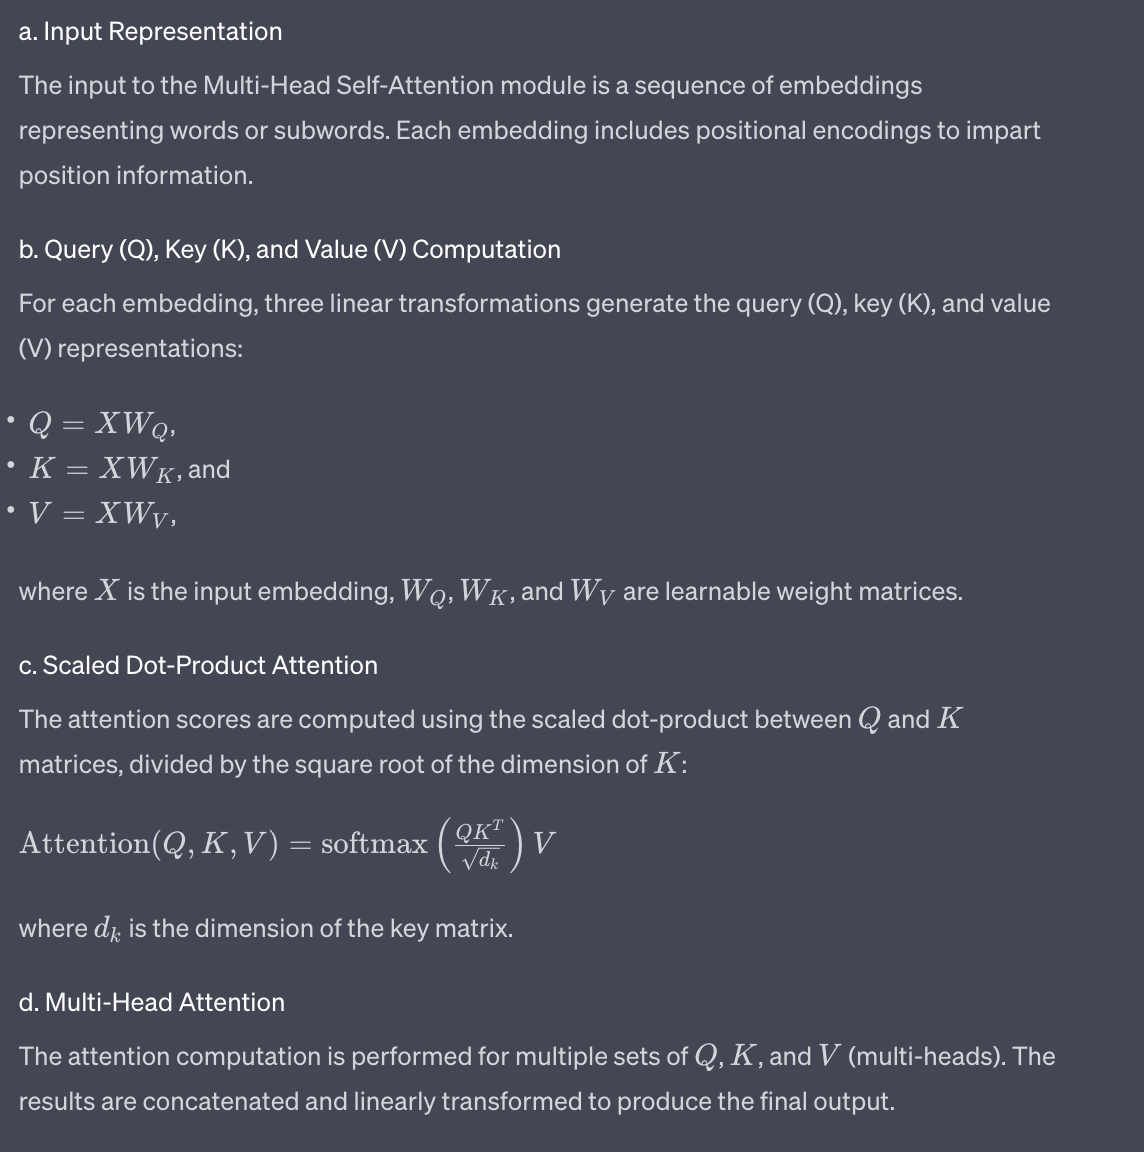

2. Position-wise Feed-Forward Networks
a. Linear Transformation
The output from the Multi-Head Self-Attention module is fed through a linear layer to change the feature dimension.

b. Non-linear Transformation
A non-linear activation function (e.g., ReLU) is applied to the output of the linear layer.

c. Linear Projection
Another linear transformation is applied to project the output back to the original dimension.

### Stacking Transformer Blocks
To create a deep architecture, multiple Transformer blocks are stacked sequentially. The output of one block serves as the input to the next block.

### Positional Encoding
To provide positional information to the model, positional encodings are added to the input embeddings before feeding them into the Transformer blocks. This allows the model to consider the order of the elements in the input sequence.

### Model Output
The final output of the last Transformer block is used for various NLP tasks, such as generating text, translating sentences, or extracting features for downstream tasks.

### Conclusion
The Transformer architecture, with its Multi-Head Self-Attention mechanism and Position-wise Feed-Forward Networks, has significantly advanced the field of NLP. Understanding the intricacies of these components is crucial for effectively utilizing and developing state-of-the-art language models.

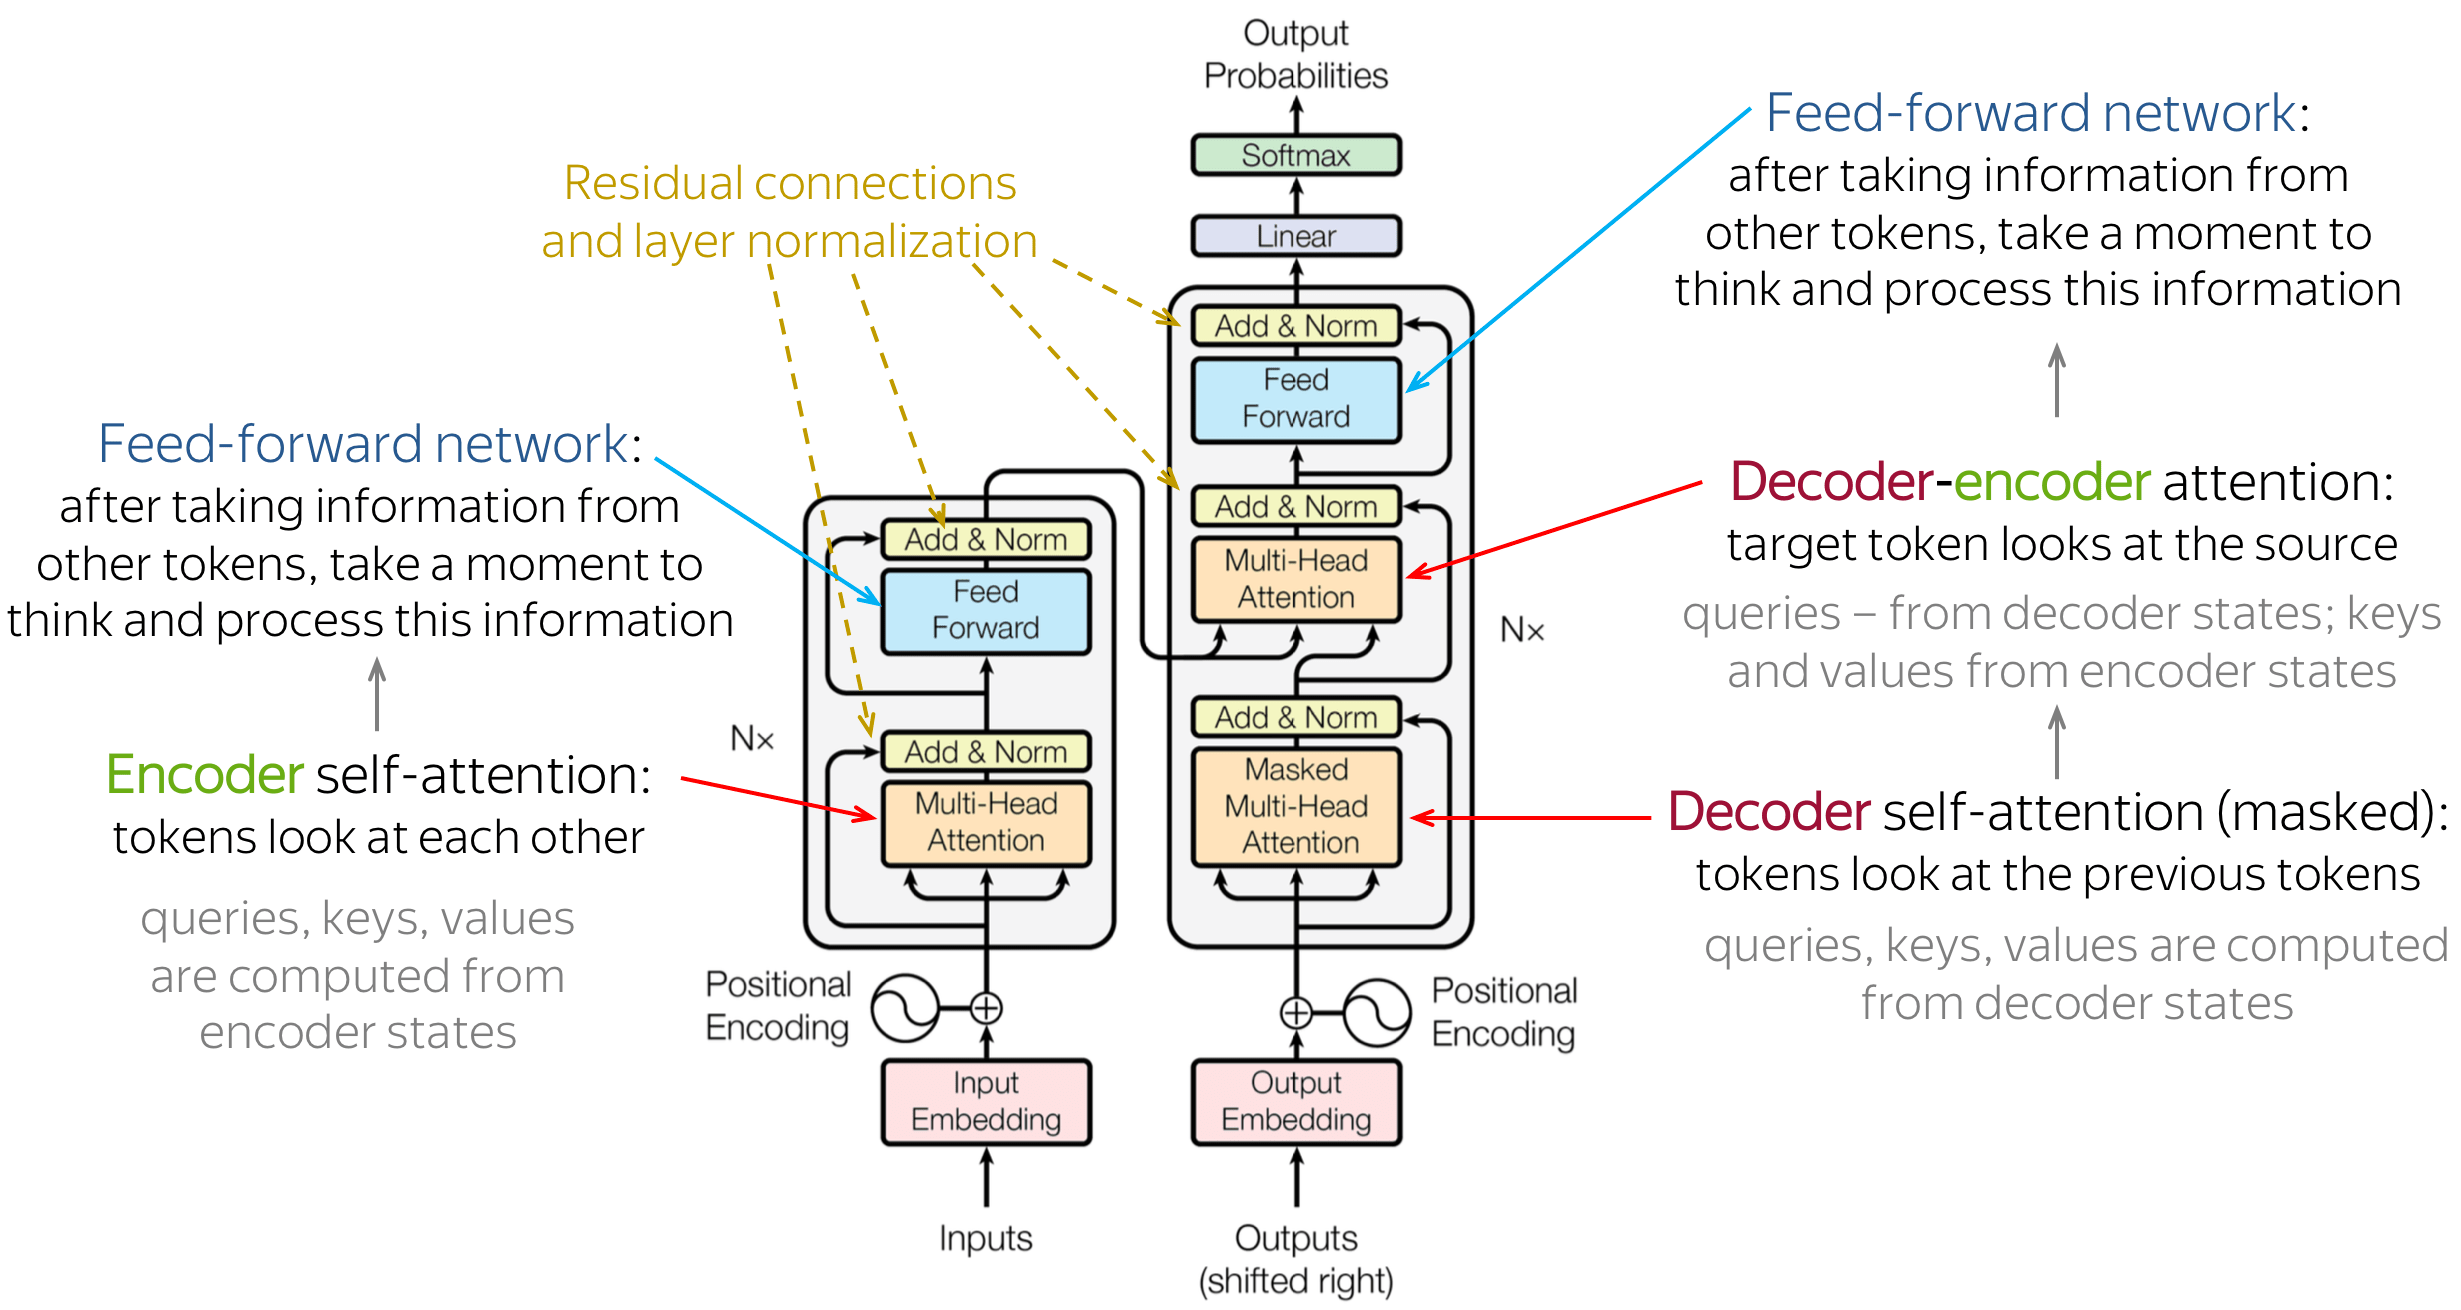